# About Data

Dataset ini memuat catatan medis 299 pasien yang memiliki gagal jantung sebelumnya di tahun 2015. Dataset terdiri dari 13 variabel berupa aspek informasi fisik, klinis, dan gaya hidup yang dapat diklasifikasikan sebagai data biner atau non-biner. Fitur biner hanya dapat memiliki nilai 0 (Tidak) atau 1 (Ya), sedangkan fitur non-biner dapat memiliki bilangan bulat nyata apa pun. Untuk algoritma prediktif, variabel DEATH_EVENT berfungsi sebagai label (output).

Sumber Data : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Data Atribute 

Dataset terdiri dari 13 variabel yaitu:
1. age : Usia pasien (tahun)
2. anaemia : Penurunan sel darah merah atau hemoglobin (boolean)
3. creatinine_phosphokinase : Tingkat enzim CPK dalam darah (mcg/L)
4. diabetes : Jika pasien menderita diabetes (boolean)
5. ejection_fraction : Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)
6. high_blood_pressure : Jika pasien mengalami hipertensi (boolean)
7. platelets : Trombosit dalam darah (kiloplatelet/mL)
8. serum_kreatinin : Kadar kreatinin serum dalam darah (mg/dL)
9. serum_sodium : Kadar natrium serum dalam darah (mEq/L)
10. sex : Apakah pasien perempuan atau laki-laki (biner)
11. smoking : Jika pasien merokok atau tidak (boolean)
12. time : Periode tindak lanjut (hari)
13. DEATH_EVENT : Jika pasien meninggal selama masa tindak lanjut (boolean)

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# linear algebra
import numpy as np  

# data processing
import pandas as pd  

# data visualising
import matplotlib.pyplot as plt 
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model building
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# k-fold cross validation
from sklearn.model_selection import cross_val_score

# Load Dataset

In [2]:
# import dataset
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv', header=0)

# menampilkan isi data
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# menampilkan beberapa baris awal data
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# menampilkan beberapa baris akhir data
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
# menampilkan kolom/variabel data
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
# menampilkan deskripsi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Preparation (Cleaning)

In [7]:
# mengecek apakah data memiliki nilai null
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

data tidak memiliki nilai null

In [8]:
# membuang data duplikat
dataset.drop_duplicates(inplace=True)

# Exploration Data Analysis

In [9]:
categoricals = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numericals = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

In [10]:
dataset[numericals].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


## Data Visualization 

### Numerical Variables 

Variable Age

Text(0.5, 1.0, 'age Density Based on Death Event')

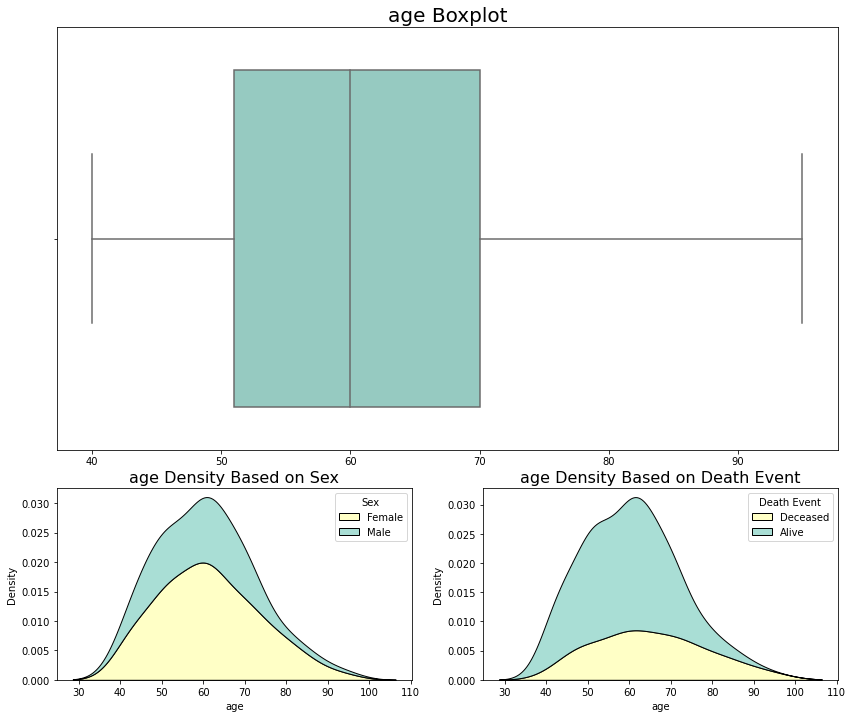

In [11]:
value = numericals[0]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Age
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Age berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=16)

# Density Plot Age berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=16)

Variable Creatinine Phosphokinase

Text(0.5, 1.0, 'creatinine_phosphokinase Density Based on Death Event')

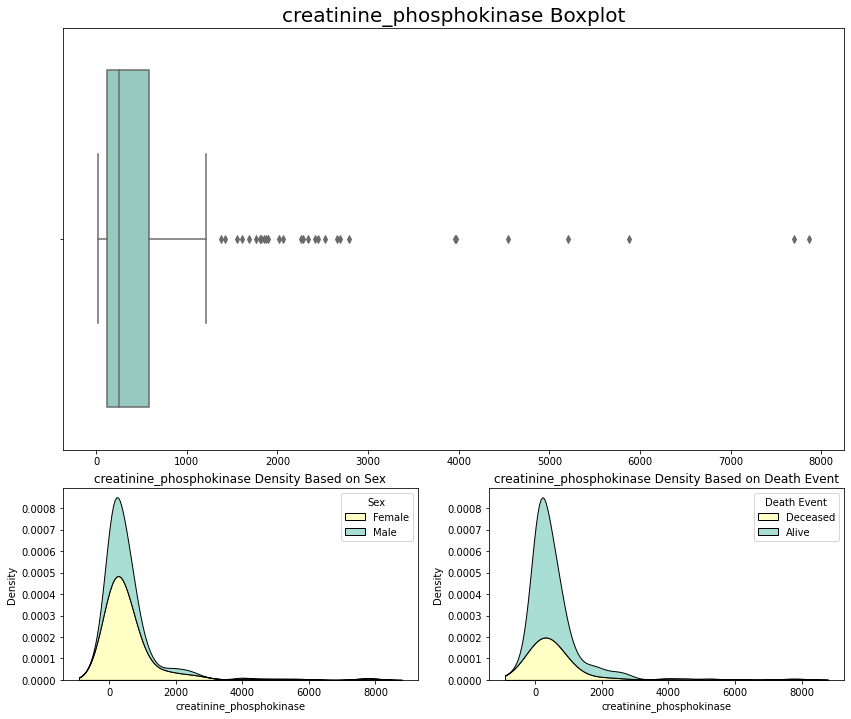

In [12]:
value = numericals[1]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Creatinine Phosphokinase
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Creatinine Phosphokinase berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=12)

# Density Plot Creatinine Phosphokinase berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=12)

Variable Ejection Fraction

Text(0.5, 1.0, 'ejection_fraction Density Based on Death Event')

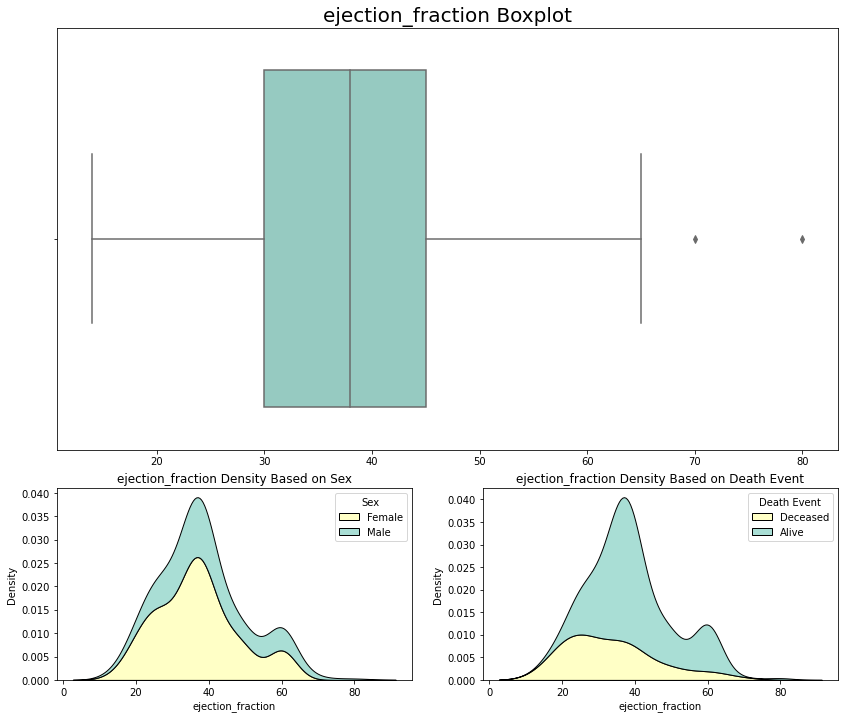

In [13]:
value = numericals[2]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Ejection Fraction
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Ejection Fraction berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=12)

# Density Plot Ejection Fraction berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=12)

Variable Platelets

Text(0.5, 1.0, 'platelets Density Based on Death Event')

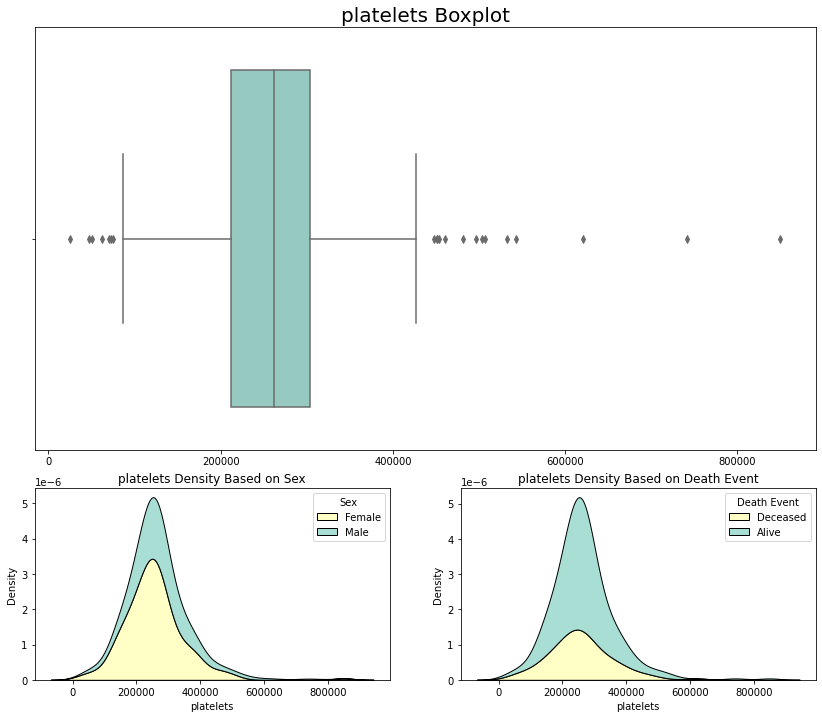

In [14]:
value = numericals[3]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Platelets
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Platelets berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=12)

# Density Plot Platelets berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=12)

Variable Serum Creatinine

Text(0.5, 1.0, 'serum_creatinine Density Based on Death Event')

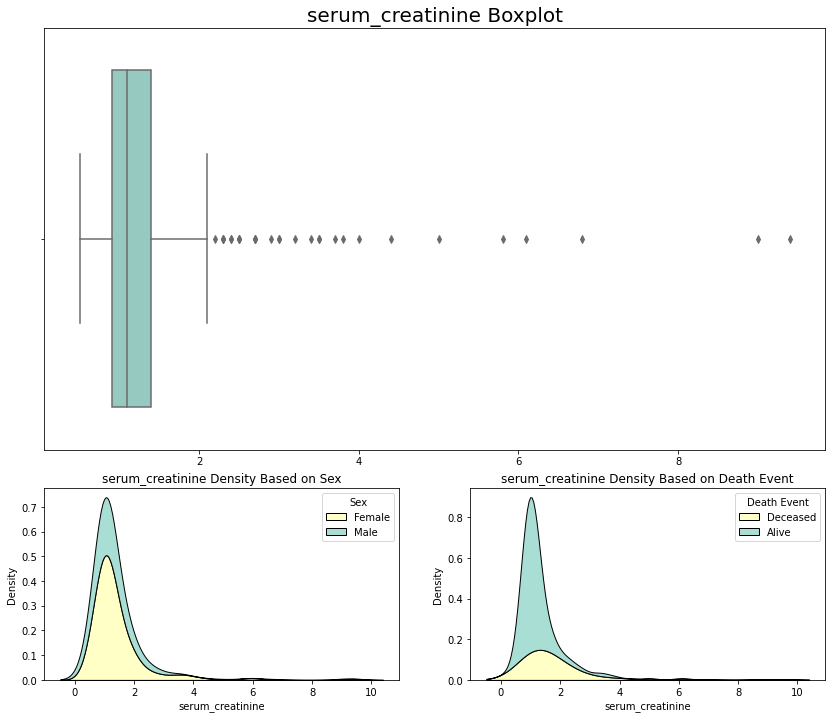

In [15]:
value = numericals[4]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Serum Creatinine
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Serum Creatinine berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=12)

# Density Plot Serum Creatinine berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=12)

Variable Serum Sodium

Text(0.5, 1.0, 'serum_sodium Density Based on Death Event')

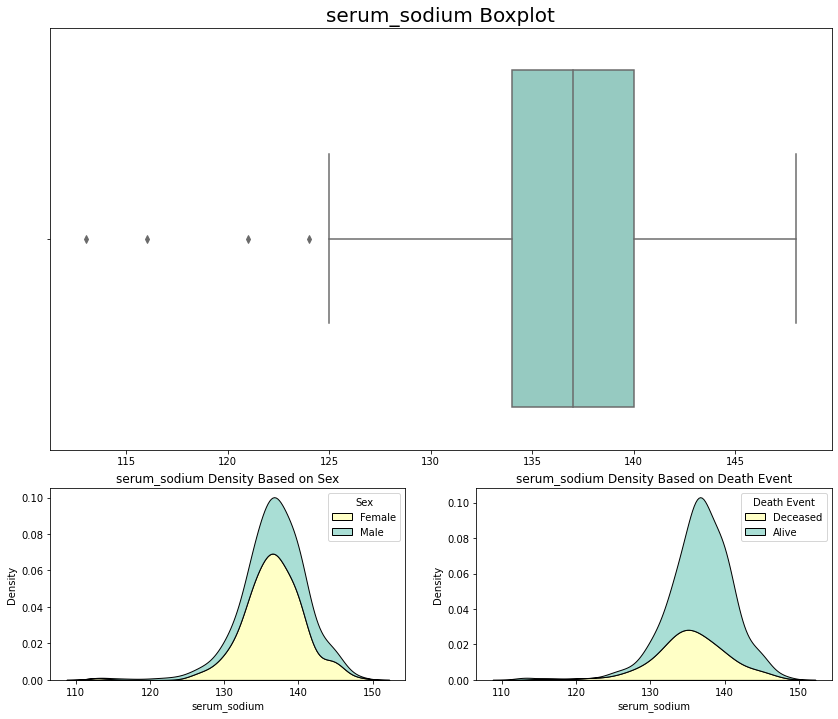

In [16]:
value = numericals[5]

gridsize = (3, 2)
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# Boxplot Serum Sodium
graph1=sns.boxplot(x=dataset[value], ax=ax1, palette="Set3")
ax1.set_title(value + ' Boxplot', fontsize=20)
ax1.set_xlabel(None)

# Density Plot Serum Sodium berdasarkan Sex
graph2=sns.kdeplot(x=dataset[value], ax=ax2, hue=dataset.sex, fill=True, palette="Set3", multiple="stack", legend=False)
ax2.legend(title='Sex', labels=['Female', 'Male'], fontsize=10, loc='best')
ax2.set_title(value + ' Density Based on Sex', fontsize=12)

# Density Plot Serum Sodium berdasarkan Death Event
graph3=sns.kdeplot(x=dataset[value], ax=ax3, hue=dataset.DEATH_EVENT, fill=True, palette="Set3", multiple="stack", legend=False)
ax3.legend(title='Death Event', labels=['Deceased','Alive'], fontsize=10, loc='best')
ax3.set_title(value + ' Density Based on Death Event', fontsize=12)

Variable Time

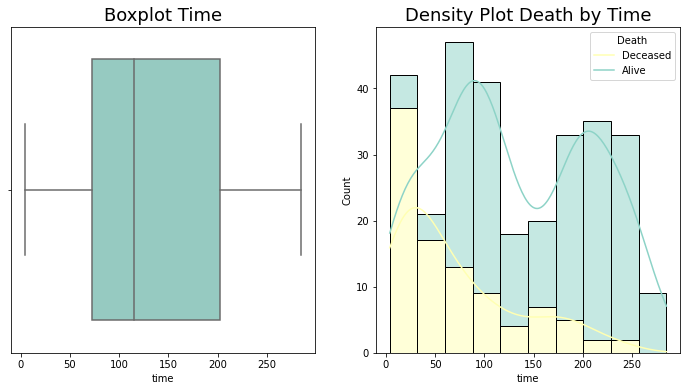

In [17]:
gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Boxplot Time by Death
graph1=sns.boxplot(data=dataset, x='time', ax=ax1, palette="Set3")
ax1.set_title('Boxplot Time', fontsize=18)

# Density Time by Death
graph3=sns.histplot(data=dataset, x='time', hue="DEATH_EVENT", kde=True, fill=True, multiple="stack", palette='Set3', ax=ax2)
ax2.set_title('Density Plot Death by Time', fontsize=18)
ax2.legend(title='Death', labels=['Deceased','Alive'], fontsize=10, loc='best')

### Categorical Variables 

Variable Death Event

Text(0, 0.5, '%')

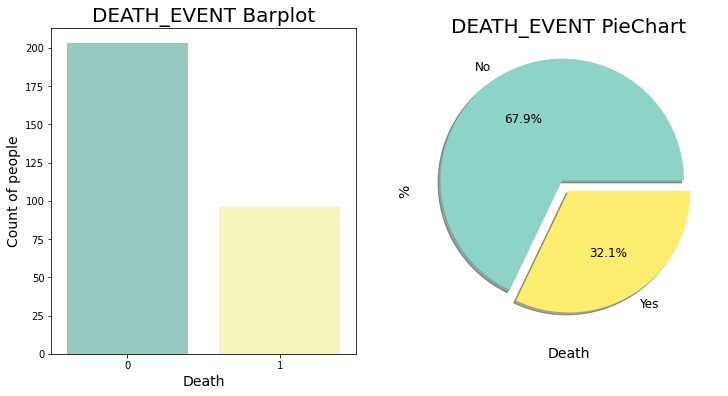

In [18]:
value = categoricals[5]

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot Death Event
graph1=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("Death", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart Death Event
graph2=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", fontsize=12, labels=["No", "Yes"], shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("Death", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

Variable Anaemia

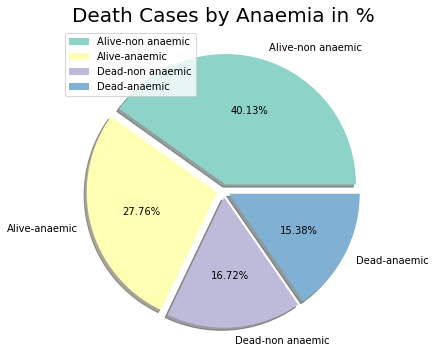

Text(0, 0.5, '%')

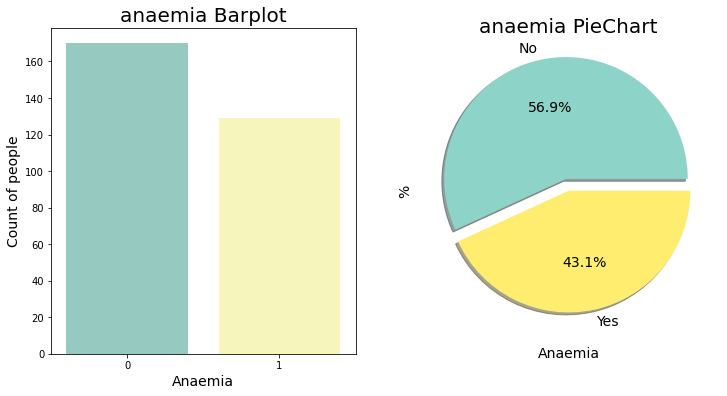

In [19]:
value = categoricals[0]

# PieChart Anaemia berdasarkan Death
plt.figure(figsize=(12,6))
df0 = dataset.groupby('DEATH_EVENT')['anaemia'].value_counts()
graph1= plt.pie(df0, autopct='%.2f%%', labels=['Alive-non anaemic', 'Alive-anaemic', 'Dead-non anaemic', 'Dead-anaemic'], explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=['#8dd3c7', '#ffffb3', '#bebada', '#80b1d3'])
plt.title('Death Cases by Anaemia in %', fontsize=20)
plt.legend(loc="upper left", fontsize=10, labels=['Alive-non anaemic', 'Alive-anaemic', 'Dead-non anaemic', 'Dead-anaemic'])
plt.show()

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot Anaemia
graph2=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("Anaemia", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart Anaemia
graph3=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", labels=["No", "Yes"], fontsize=14, shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("Anaemia", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

Variable Diabetes

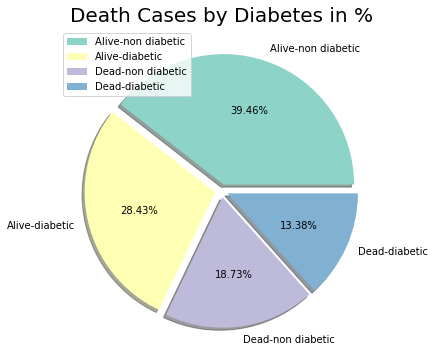

Text(0, 0.5, '%')

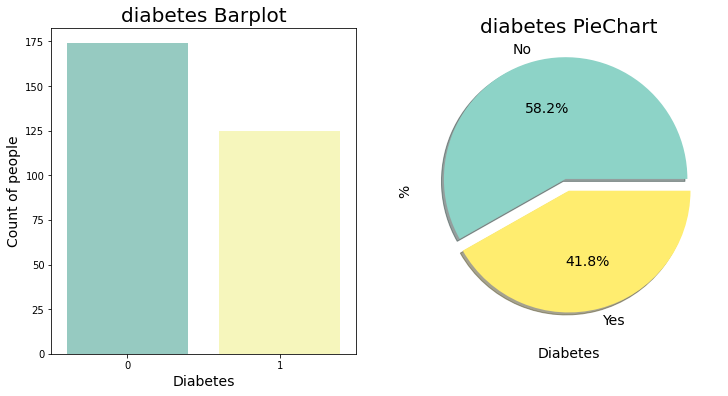

In [20]:
value = categoricals[1]

# PieChart Diabetes berdasarkan Death
plt.figure(figsize=(12,6))
df1 = dataset.groupby('DEATH_EVENT')['diabetes'].value_counts()
graph1= plt.pie(df1, autopct='%.2f%%', labels=['Alive-non diabetic', 'Alive-diabetic', 'Dead-non diabetic', 'Dead-diabetic'], explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=['#8dd3c7', '#ffffb3', '#bebada', '#80b1d3'])
plt.title('Death Cases by Diabetes in %', fontsize=20)
plt.legend(loc="upper left", fontsize=10, labels=['Alive-non diabetic', 'Alive-diabetic', 'Dead-non diabetic', 'Dead-diabetic'])
plt.show()

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot Diabetes
graph2=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("Diabetes", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart Diabetes
graph3=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", labels=["No", "Yes"], fontsize=14, shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("Diabetes", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

Variable High Blood Pressure

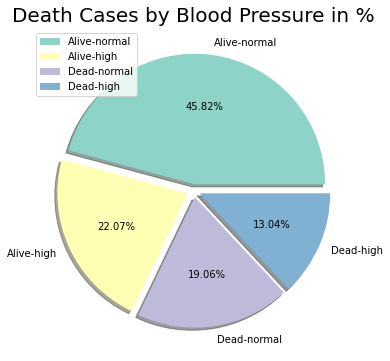

Text(0, 0.5, '%')

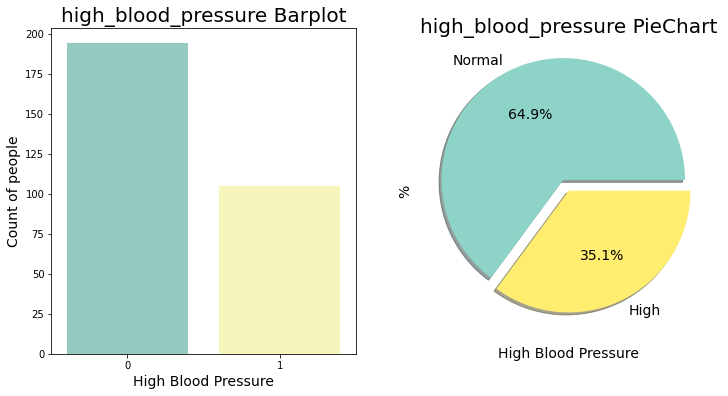

In [21]:
value = categoricals[2]

# PieChart High Blood Pressure berdasarkan Death
plt.figure(figsize=(12,6))
df2 = dataset.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()
graph1= plt.pie(df2, autopct='%.2f%%', labels=['Alive-normal', 'Alive-high', 'Dead-normal', 'Dead-high'], explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=['#8dd3c7', '#ffffb3', '#bebada', '#80b1d3'])
plt.title('Death Cases by Blood Pressure in %', fontsize=20)
plt.legend(loc="upper left", fontsize=10, labels=['Alive-normal', 'Alive-high', 'Dead-normal', 'Dead-high'])
plt.show()

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot High Blood Pressure
graph2=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("High Blood Pressure", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart High Blood Pressure
graph3=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", labels=["Normal", "High"], fontsize=14, shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("High Blood Pressure", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

Variable Sex

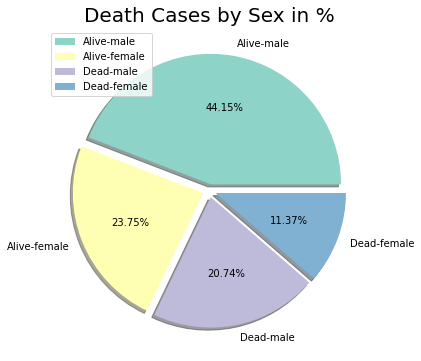

Text(0, 0.5, '%')

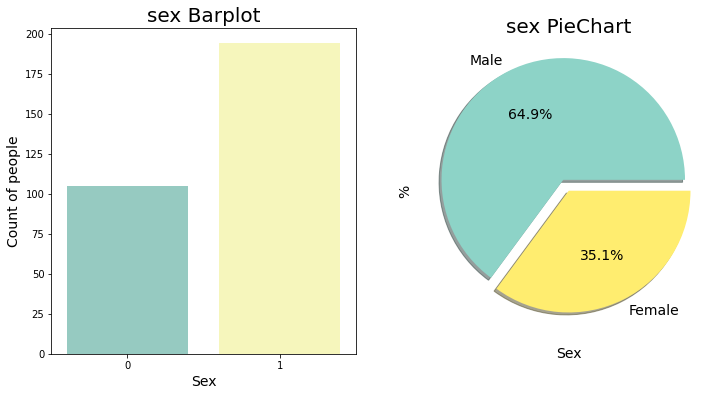

In [22]:
value = categoricals[3]

# PieChart Sex berdasarkan Death
plt.figure(figsize=(12,6))
df3 = dataset.groupby('DEATH_EVENT')['sex'].value_counts()
graph1= plt.pie(df3, autopct='%.2f%%', labels=['Alive-male', 'Alive-female', 'Dead-male', 'Dead-female'], explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=['#8dd3c7', '#ffffb3', '#bebada', '#80b1d3'])
plt.title('Death Cases by Sex in %', fontsize=20)
plt.legend(loc="upper left", fontsize=10, labels=['Alive-male', 'Alive-female', 'Dead-male', 'Dead-female'])
plt.show()

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot Sex
graph2=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("Sex", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart Sex
graph3=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", labels=["Male", "Female"], fontsize=14, shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("Sex", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

Variable Smoking

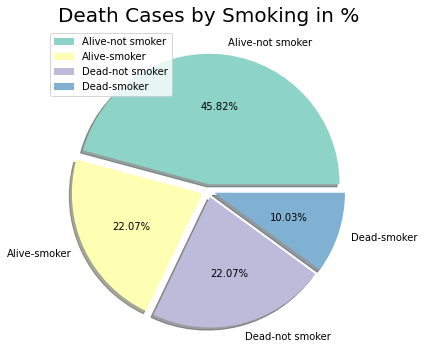

Text(0, 0.5, '%')

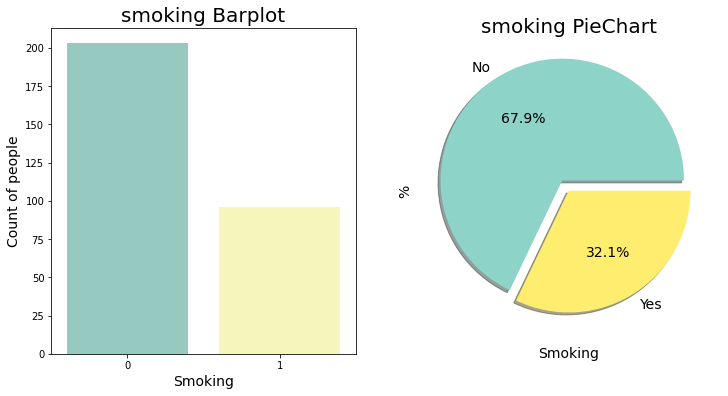

In [23]:
value = categoricals[4]

# PieChart Smoking berdasarkan Death
plt.figure(figsize=(12,6))
df4 = dataset.groupby('DEATH_EVENT')['smoking'].value_counts()
graph1= plt.pie(df4, autopct='%.2f%%', labels=['Alive-not smoker', 'Alive-smoker', 'Dead-not smoker', 'Dead-smoker'], explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=['#8dd3c7', '#ffffb3', '#bebada', '#80b1d3'])
plt.title('Death Cases by Smoking in %', fontsize=20)
plt.legend(loc="upper left", fontsize=10, labels=['Alive-not smoker', 'Alive-smoker', 'Dead-not smoker', 'Dead-smoker'])
plt.show()

gridsize = (1, 2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Barplot Smoking
graph2=sns.countplot(x=dataset[value], palette='Set3', ax=ax1)
ax1.set_title(value + ' Barplot', fontsize=20)
ax1.set_xlabel("Smoking", fontsize=14)
ax1.set_ylabel("Count of people", fontsize=14)

# PieChart Smoking
graph3=dataset[value].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2, colormap="Set3", labels=["No", "Yes"], fontsize=14, shadow=True, explode=[0.1,0])
ax2.set_title(value + ' PieChart', fontsize=20)
ax2.set_xlabel("Smoking", fontsize=14)
ax2.set_ylabel("%", fontsize=14)

## Data Correlations

### Correlations between Features

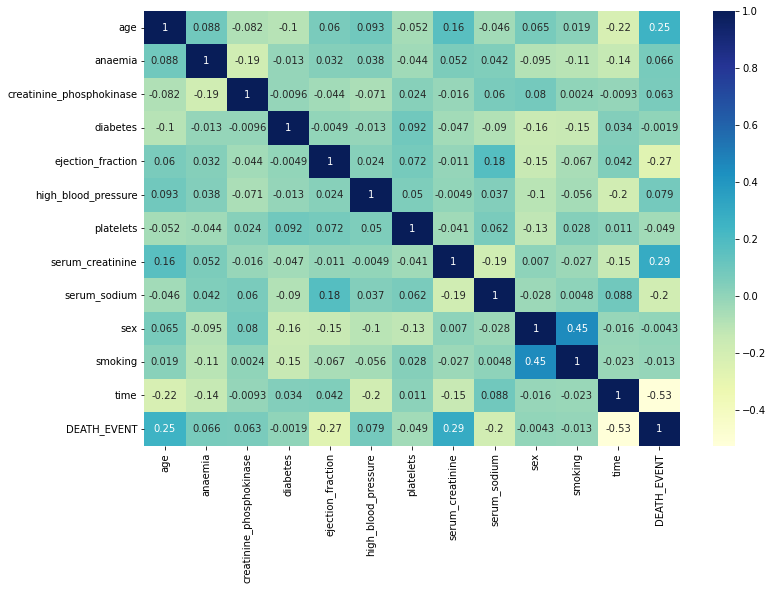

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Feature Selection Based on Correlations of Features with Target Variable

In [25]:
# menghitung korelasi fitur dengan target variabel
dataset.drop(columns=['DEATH_EVENT']).corrwith(dataset['DEATH_EVENT'])

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
dtype: float64

In [26]:
# menghitung korelasi fitur dengan target variabel
# dan membuat tabel peringkat/urutan korelasi dari besar-kecil antara fitur dan target variabel
corr_df=dataset.corr()
corr_death=corr_df[['DEATH_EVENT']][0:-1]
corr_death['ABS_DEATH_EVENT']=abs(corr_death.values)
corr_death['Rank']=corr_death['ABS_DEATH_EVENT'].rank()
corr_death=corr_death.sort_values(by='Rank', ascending=False)
corr_death

,DEATH_EVENT,ABS_DEATH_EVENT,Rank
time,-0.526964,0.526964,12.0
serum_creatinine,0.294278,0.294278,11.0
ejection_fraction,-0.268603,0.268603,10.0
age,0.253729,0.253729,9.0
serum_sodium,-0.195204,0.195204,8.0
high_blood_pressure,0.079351,0.079351,7.0
anaemia,0.066270,0.066270,6.0
creatinine_phosphokinase,0.062728,0.062728,5.0
platelets,-0.049139,0.049139,4.0
smoking,-0.012623,0.012623,3.0


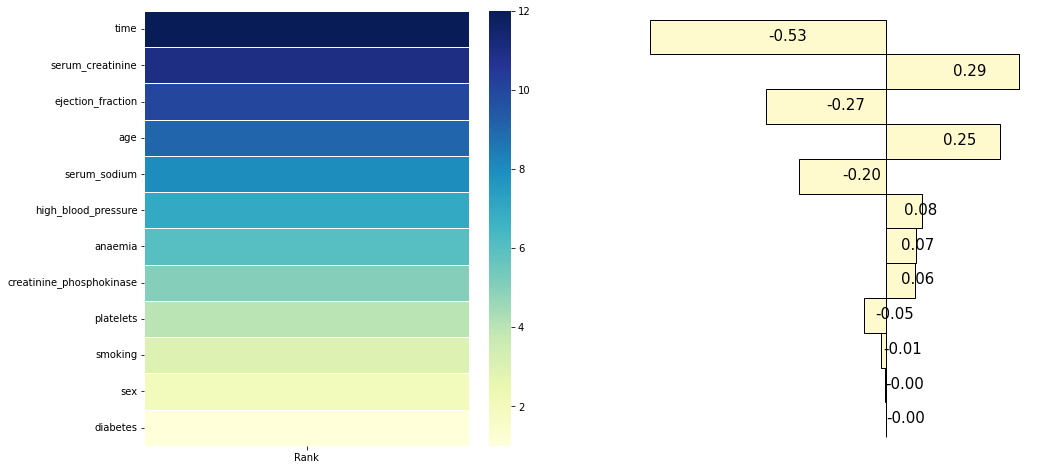

In [27]:
# membuat visualisasi grafik peringkat/urutan korelasi fitur dan target variabel
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.heatmap(corr_death[['Rank']],
           vmin=corr_death[['Rank']].min(), vmax=corr_death[['Rank']].max(),
            cmap='YlGnBu',
            linewidths=.5)
plt.subplot(1,2,2)
corr_death.sort_values(by='Rank', ascending=True)['DEATH_EVENT'].plot(kind='barh', color='lemonchiffon', width=1, edgecolor='black')
for i, value in enumerate(corr_death.sort_values(by='Rank', ascending=True)['DEATH_EVENT']):
    text="{:.2f}".format(value)
    plt.annotate(text=text, xy=(value/2, i-0.1), fontsize=15)
        
plt.axis('off')

plt.show()

In [28]:
# mencari fitur yang memiliki korelasi lebih dari 0.1 atau kurang dari -0.1
corr_death[abs(corr_death['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

time                -0.526964
serum_creatinine     0.294278
ejection_fraction   -0.268603
age                  0.253729
serum_sodium        -0.195204
Name: DEATH_EVENT, dtype: float64

In [29]:
columns = dataset.drop(columns=['DEATH_EVENT']).columns[np.array(abs(dataset.drop(columns=['DEATH_EVENT']).corrwith(dataset['DEATH_EVENT']).array) > 0.1)]
print(columns)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'], dtype='object')


Fitur 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', dan 'time' memiliki korelasi yang cukup besar dengan 'DEATH_EVENT'

# Data Preprocessing

In [30]:
# variabel independen X (feature) hanya akan terdiri dari fitur yang memiliki korelasi baik
df = dataset.copy()
feature_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# menentukan variabel independen X dan variabel dependen (target) Y
X = df[feature_cols] # Features
y = df['DEATH_EVENT'] # Target variable

In [31]:
# membagi data training 80% dan testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# menormalkan fitur(setiap kolom X) sehingga setiap kolom/fitur/variabel akan memiliki mean = 0 dan standard deviation = 1
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))

# Modeling

In [33]:
# membuat list nama dan akurasi model
model_list=[]
accuracy_list=[]
f1score_list=[]
roc_auc_list=[]

## Decision Tree Algorithm

In [34]:
# Membangun model Decision Tree
dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

model_list.append('Decision Tree')

In [35]:
# Performa Model Decision Tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.86      0.83      0.84        23

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



In [36]:
# Akurasi dari Model Decision Tree
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

# f1-score dari Model Decision Tree
dt_f1score = f1_score(y_test, dt_pred)
f1score_list.append(100*dt_f1score)

print("Accuracy of Decision Tree Model is : ", "{:.2f}%".format(100* dt_acc))
print("f1-Score of Decision Tree Model is : ", "{:.2f}%".format(100* dt_f1score))

Accuracy of Decision Tree Model is :  88.33%
f1-Score of Decision Tree Model is :  84.44%


<Figure size 432x288 with 0 Axes>

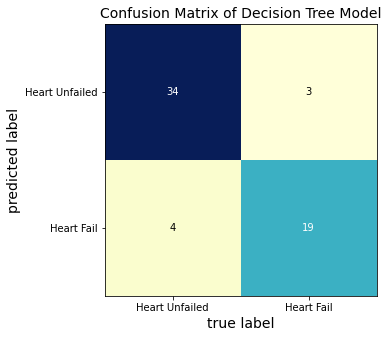

In [37]:
# Confusion Matrix dari Model Decision Tree
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix of Decision Tree Model", fontsize=14)
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.xticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.show()

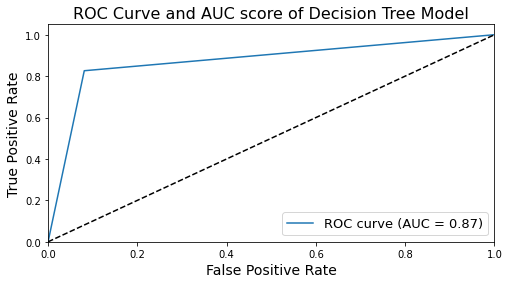

In [38]:
# Membentuk Kurva ROC dan Menghitung Nilai AUC dari Model Decision Tree
dt_pred_prob = dt_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob[:,1])
roc_auc_dt= auc(fpr, tpr)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve and AUC score of Decision Tree Model', fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.show()

roc_auc_list.append(roc_auc_dt)

## K-Nearest Neighbors Algorithm

In [39]:
# Membangun model K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

model_list.append('K-Nearest Neighbors')

In [40]:
# Performa Model K-Nearest Neighbors
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.82      0.61      0.70        23

    accuracy                           0.80        60
   macro avg       0.81      0.76      0.77        60
weighted avg       0.80      0.80      0.79        60



In [41]:
# Akurasi dari Model K-Nearest Neighbors
knn_acc = accuracy_score(y_test, knn_pred)
accuracy_list.append(100*knn_acc)

# f1-score dari Model K-Nearest Neighbors
knn_f1score = f1_score(y_test, knn_pred)
f1score_list.append(100*knn_f1score)

print("Accuracy of K-Nearest Neighbors Model is : ", "{:.2f}%".format(100* knn_acc))
print("f1-Score of K-Nearest Neighbors Model is : ", "{:.2f}%".format(100* knn_f1score))

Accuracy of K-Nearest Neighbors Model is :  80.00%
f1-Score of K-Nearest Neighbors Model is :  70.00%


<Figure size 432x288 with 0 Axes>

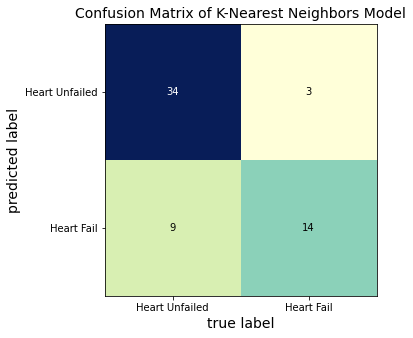

In [42]:
# Confusion Matrix dari Model K-Nearest Neighbors
cm = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix of K-Nearest Neighbors Model", fontsize=14)
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.xticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.show()

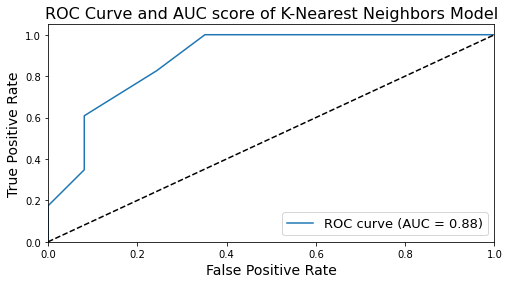

In [43]:
# Membentuk Kurva ROC dan Menghitung Nilai AUC dari Model K-Nearest Neighbors
knn_pred_prob = knn_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob[:,1])
roc_auc_knn= auc(fpr, tpr)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve and AUC score of K-Nearest Neighbors Model', fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.show()

roc_auc_list.append(roc_auc_knn)

## Naive Bayes Algorithm

In [44]:
# Membangun model Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

model_list.append('Naive Bayes')

In [45]:
# Performa Model Naive Bayes
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60



In [46]:
# Akurasi dari Model Naive Bayes
nb_acc = accuracy_score(y_test, nb_pred)
accuracy_list.append(100*nb_acc)

# f1-score dari Model K-Nearest Neighbors
nb_f1score = f1_score(y_test, nb_pred)
f1score_list.append(100*nb_f1score)

print("Accuracy of Naive Bayes Model is : ", "{:.2f}%".format(100* nb_acc))
print("f1-Score of Naive Bayes Model is : ", "{:.2f}%".format(100* nb_f1score))

Accuracy of Naive Bayes Model is :  80.00%
f1-Score of Naive Bayes Model is :  68.42%


<Figure size 432x288 with 0 Axes>

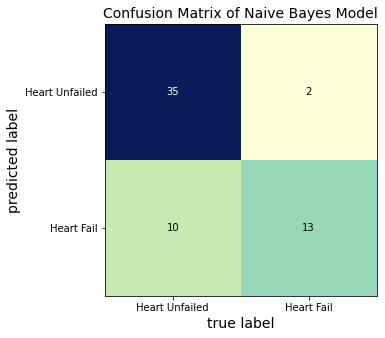

In [47]:
# Confusion Matrix dari Model Naive Bayes
cm = confusion_matrix(y_test, nb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(5,5), hide_ticks=True, cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix of Naive Bayes Model", fontsize=14)
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.xticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Unfailed","Heart Fail"], fontsize=10)
plt.show()

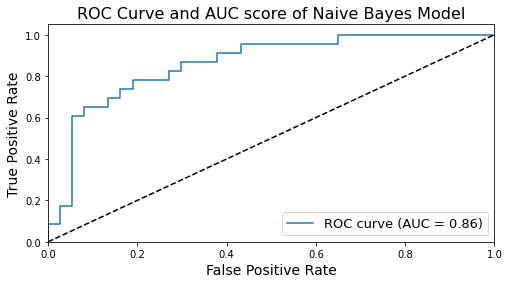

In [48]:
# Membentuk Kurva ROC dan Menghitung Nilai AUC dari Model Naive Bayes
nb_pred_prob = nb_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, nb_pred_prob[:,1])
roc_auc_nb= auc(fpr, tpr)
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve and AUC score of Naive Bayes Model', fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.show()

roc_auc_list.append(roc_auc_nb)

# Model Evaluation

In [49]:
model_comparison = pd.DataFrame(list(zip(model_list, accuracy_list, f1score_list, roc_auc_list)), columns =['Model', 'Accuracy (%)','F1-Score (%)', 'ROC-AUC Score'])
model_comparison

,Model,Accuracy (%),F1-Score (%),ROC-AUC Score
0,Decision Tree,88.333333,84.444444,0.872503
1,K-Nearest Neighbors,80.000000,70.000000,0.884841
2,Naive Bayes,80.000000,68.421053,0.861340


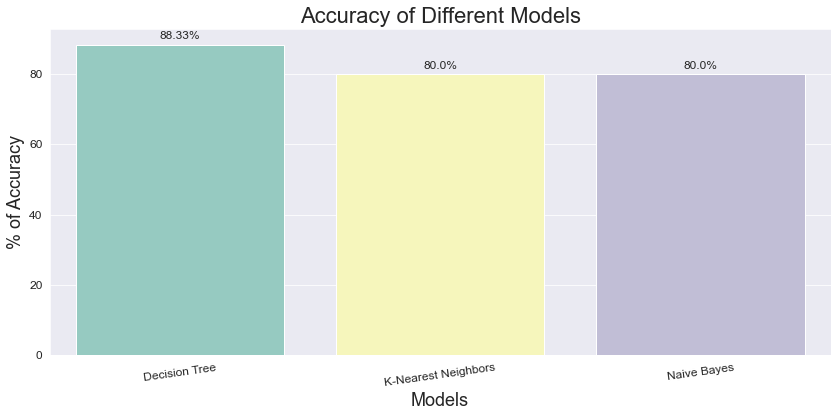

In [50]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
models=sns.barplot(x=model_list, y=accuracy_list, palette = "Set3")
plt.xlabel('Models', fontsize = 18)
plt.ylabel('% of Accuracy', fontsize = 18)
plt.title('Accuracy of Different Models', fontsize = 22)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in models.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    models.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
    
plt.show()

# Cross Validation

In [51]:
# Mengitung nilai K-Fold Cross Validation untuk masing-masing model
kfold_dt = cross_val_score(estimator = dt_clf, X = X_train, y = y_train, cv = 10)
kfold_knn = cross_val_score(estimator = knn_clf, X = X_train, y = y_train, cv = 10)
kfold_nb = cross_val_score(estimator = nb_clf, X = X_train, y = y_train, cv = 10)

# cv = jumlah fold; di sini nilai cv = 10

In [52]:
# Menghitung nilai rata-rata, minimum, dan maksimum untuk masing-masing nilai K-Fold Cross Validation model
kfold_acc_mean = [np.mean(kfold_dt), np.mean(kfold_knn), np.mean(kfold_nb)]
kfold_acc_max = [np.max(kfold_dt), np.max(kfold_knn), np.max(kfold_nb)]
kfold_acc_min = [np.min(kfold_dt), np.min(kfold_knn), np.min(kfold_nb)]

In [53]:
kfold_comparison = pd.DataFrame(list(zip(model_list, kfold_acc_min, kfold_acc_mean, kfold_acc_max)), columns =['Model', 'K-Fold Accuracies Min','K-Fold Accuracies Mean', 'K-Fold Accuracies Max'])
kfold_comparison

,Model,K-Fold Accuracies Min,K-Fold Accuracies Mean,K-Fold Accuracies Max
0,Decision Tree,0.708333,0.807609,0.875000
1,K-Nearest Neighbors,0.750000,0.786594,0.875000
2,Naive Bayes,0.708333,0.803442,0.916667


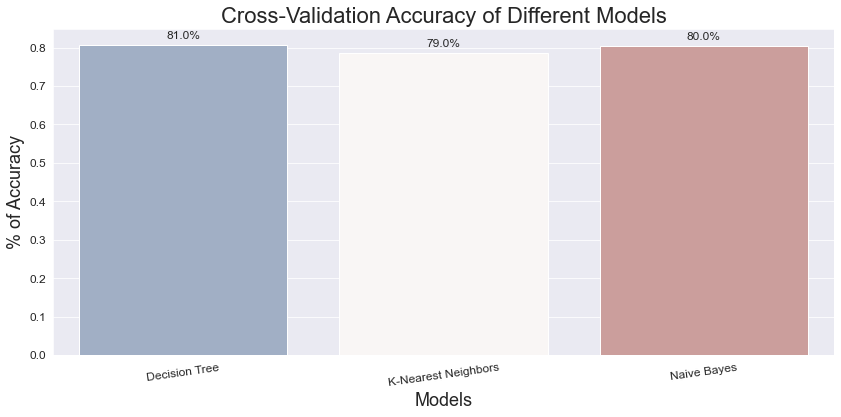

In [54]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
models=sns.barplot(x=model_list, y=kfold_acc_mean, palette = "vlag")
plt.xlabel('Models', fontsize = 18)
plt.ylabel('% of Accuracy', fontsize = 18)
plt.title('Cross-Validation Accuracy of Different Models', fontsize = 22)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)

for i in models.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    models.annotate(f'{round(height,2)*100}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'large')
    
plt.show()

Kesimpulan : Model Decision Tree merupakan model terbaik dari ketiga algoritma pemodelan berdasarkan nilai akurasi, f1, roc-auc, dan rata-rata nilai akurasi dari cross validationnya.